# Import Liabraries

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset

In [151]:
df = pd.read_csv(r'Loan_approvals.csv')

# Basic information

In [152]:
print("Dataset Shape:", df.shape)

Dataset Shape: (614, 13)


In [153]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Female,No,0,Graduate,No,150,0.0,9,360,0,Rural,N
1,LP001003,Female,No,0,Graduate,No,210,0.0,17,360,0,Rural,N
2,LP001005,Female,No,0,Graduate,No,416,0.0,25,360,0,Rural,N
3,LP001006,Female,No,0,Graduate,No,645,0.0,25,360,0,Rural,N
4,LP001008,Female,No,0,Graduate,No,674,0.0,26,360,0,Rural,N


In [154]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 62.5+ KB


In [155]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [156]:
print(df['Loan_Status'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [157]:
print("\nStatistical Description:")
df.describe()


Statistical Description:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.0,614.000000
mean,5403.459283,1621.245603,186.850163,360.0,0.855049
std,6109.041673,2926.248477,233.982948,0.0,0.352339
min,150.000000,0.000000,9.000000,360.0,0.000000
25%,2877.500000,0.000000,100.250000,360.0,1.000000
50%,3812.500000,1188.500000,129.000000,360.0,1.000000
75%,5795.000000,2297.250000,175.000000,360.0,1.000000
max,81000.000000,41667.000000,1800.000000,360.0,1.000000


# EDA: Visualizations

### 1. Target variable distribution

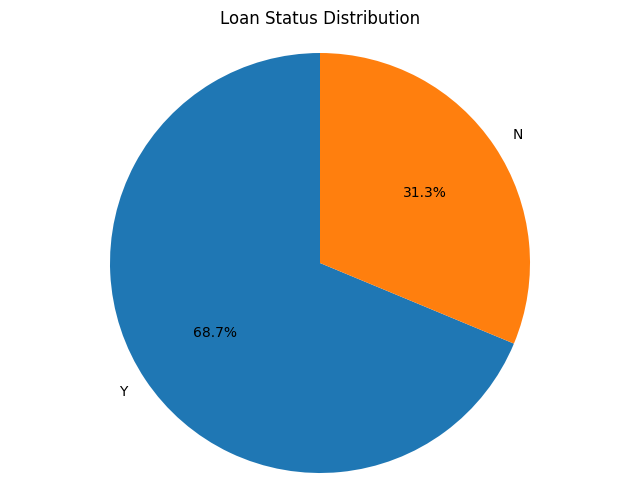

In [158]:
plt.figure(figsize=(8, 6))
loan_status_counts = df['Loan_Status'].value_counts()
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.axis('equal')
plt.show()

### 2. Gender distribution

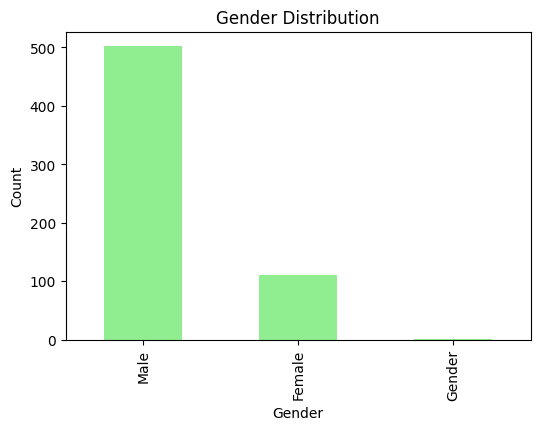

In [159]:
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 3. Married distribution

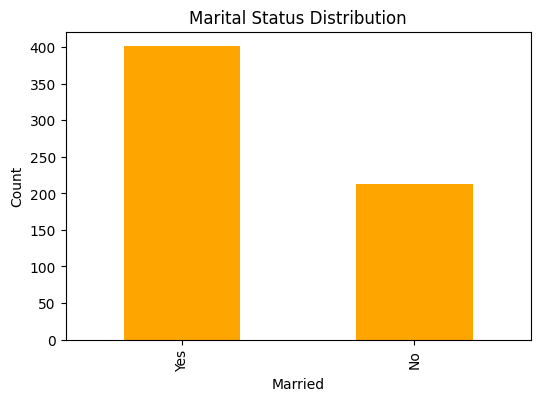

In [160]:
plt.figure(figsize=(6, 4))
df['Married'].value_counts().plot(kind='bar', color='orange')
plt.title('Marital Status Distribution')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

### 4. Education distribution

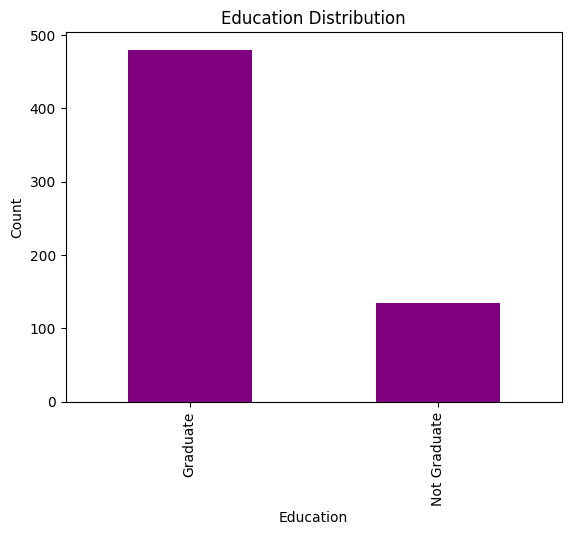

In [161]:
df['Education'].value_counts().plot(kind='bar', color='purple')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

### 5. Applicant Income distribution

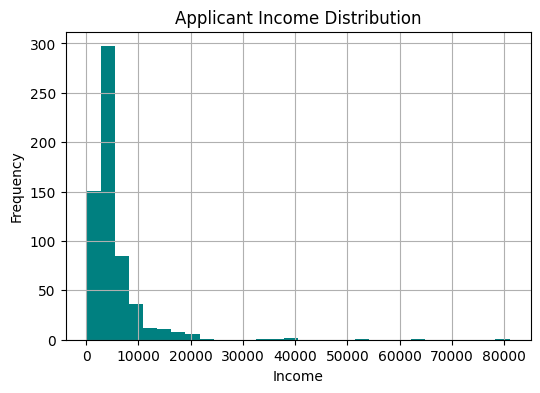

In [162]:
plt.figure(figsize=(6, 4))
df['ApplicantIncome'].hist(bins=30, color='teal')
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### 6. Loan Amount distribution

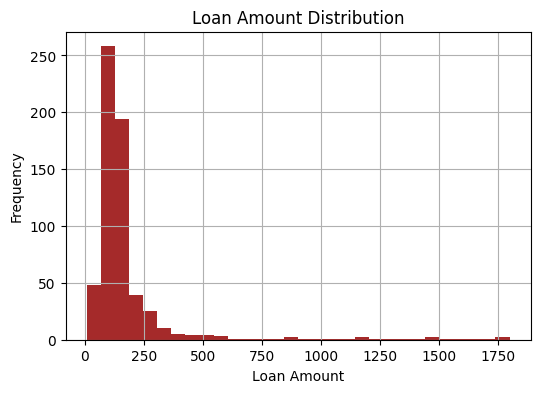

In [163]:
plt.figure(figsize=(6, 4))
df['LoanAmount'].hist(bins=30, color='brown')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### 7. Credit History distribution

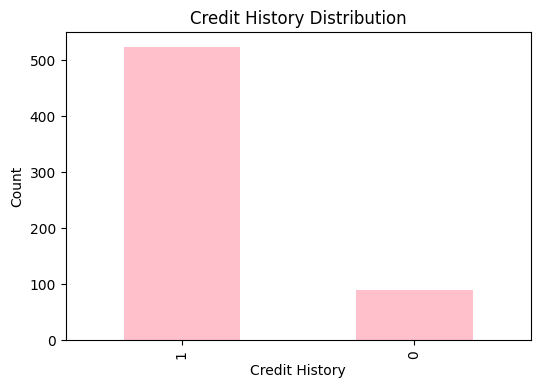

In [164]:
plt.figure(figsize=(6, 4))
df['Credit_History'].value_counts().plot(kind='bar', color='pink')
plt.title('Credit History Distribution')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

### 8. Property Area distribution

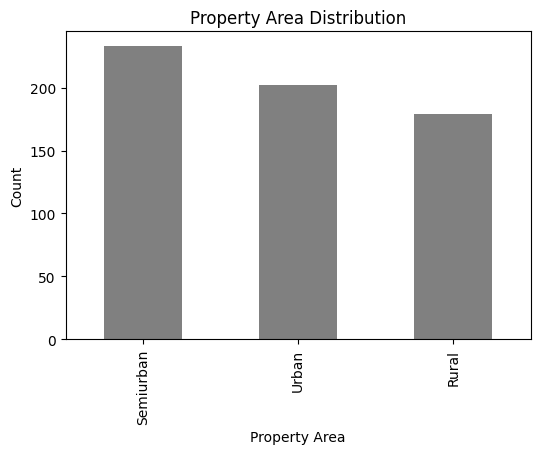

In [165]:
plt.figure(figsize=(6, 4))
df['Property_Area'].value_counts().plot(kind='bar', color='gray')
plt.title('Property Area Distribution')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

# Feature Engineering

### Encode categorical variables

In [166]:
label_encoders = {}
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

joblib.dump(label_encoders, 'label_encoders.pkl')
print("Label encoders saved as label_encoders.pkl")

Label encoders saved as label_encoders.pkl


# Prepare features and target

In [167]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Split the data

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features

In [169]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


# Smote to handle over-sampling

In [170]:
# Impute missing values in X_train_scaled before SMOTE
num_imputer = SimpleImputer(strategy='mean')
X_train_imputed = num_imputer.fit_transform(X_train_scaled)

# Apply SMOTE to the imputed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Target Variables after Smote

In [171]:
print(y_train_resampled.value_counts())

Loan_Status
1    302
0    302
Name: count, dtype: int64


# Model Building

In [172]:
model = RandomForestClassifier(random_state=42)

# Train and evaluate models

In [173]:
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test_scaled)

### Accuracy

In [174]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy*100:.2f}")

Accuracy : 100.00


### Classification Report

In [175]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report :\n", classification_report)

Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       120

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [176]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cm)

Confusion Matrix :
 [[ 65   0]
 [  0 120]]


In [177]:
joblib.dump(model, 'loan_approval.pkl')
print("Model saved as loan_approval.pkl")

Model saved as loan_approval.pkl
